In [142]:
import pandas as pd

In [ ]:
new_account_df = pd.read_csv('new_account.csv')
new_contact_df = pd.read_csv('new_contact.csv')
new_pmdm_df = pd.read_csv('new_pmdm.csv')
new_client_goal_df = pd.read_csv('new_client_goal.csv')
new_case_note_df = pd.read_csv('new_case_note.csv')
new_income_df = pd.read_csv('new_income.csv')
new_wage_detail_df = pd.read_csv('new_wage_detail.csv')
new_assessment_df = pd.read_csv('new_assessment.csv')
new_education_history_df = pd.read_csv('new_education_history.csv')
new_employment_history_df = pd.read_csv('new_employment_history.csv')
new_pmdm_servicedelivery_df = pd.read_csv('new_pmdm_servicedelivery.csv')
new_partner_agency_enrollment_df = pd.read_csv('new_partner_agency_enrollment.csv')
new_grant_df = pd.read_csv('new_grant.csv')
new_grant_item_df = pd.read_csv('new_grant_item.csv')
new_financial_assistance_df = pd.read_csv('new_financial_assistance.csv')

dfs = [new_account_df, new_contact_df, new_pmdm_df, new_case_note_df, new_income_df, new_wage_detail_df, new_assessment_df, new_education_history_df, new_employment_history_df, new_pmdm_servicedelivery_df, new_partner_agency_enrollment_df, new_client_goal_df, new_grant_df, new_grant_item_df, new_financial_assistance_df]

/var/folders/v9/49sy3j4906n615jbkdwpxtbm0000gn/T/ipykernel_67765/773357567.py:5: DtypeWarning: Columns (1,4,5,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,31,33,35,37,39,40,42,44,46,48,50,52,54,56,57,59,61,62,63,65,66,67,68,70,72,74,76,78,80,81,83,85,86,88,90,91,92,93,95,96,97,98,100,101,103,105,107,109,111,113,115,117,119,121,122,124,126,128,129,131,132,133,134,136,137,138,139,140,141,143) have mixed types. Specify dtype option on import or set low_memory=False.
  new_case_note_df = pd.read_csv('/Users/yejinchoi/Desktop/capstone/new_case_note.csv')
/var/folders/v9/49sy3j4906n615jbkdwpxtbm0000gn/T/ipykernel_67765/773357567.py:11: DtypeWarning: Columns (26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  new_pmdm_servicedelivery_df = pd.read_csv('/Users/yejinchoi/Desktop/capstone/new_pmdm_servicedelivery.csv')


### Goal: Identify which sequences of services (service paths) lead to the best outcomes for families with similar characteristics.

### Step 1: Define “Similar Situations”

/var/folders/v9/49sy3j4906n615jbkdwpxtbm0000gn/T/ipykernel_67765/216121104.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_assessment_df[features] = new_assessment_df[features].astype(int)


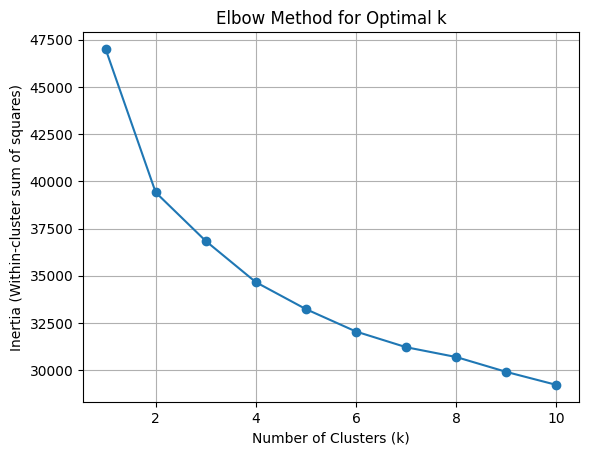

    situation_cluster  ADULT_EDUCATION_ASSM__C  CHILD_CARE_ASSM__C  \
0                   1                        5                   0   
1                   0                        4                   0   
8                   1                        3                   3   
9                   0                        3                   0   
12                  1                        3                   0   

    CHILDRENS_EDUCATION_ASSM__C  COMMUNITY_INVOLVEMENT_ASSM__C  \
0                             5                              3   
1                             5                              3   
8                             5                              4   
9                             5                              2   
12                            5                              4   

    DISABILITIES_ASSM__C  EMPLOYMENT_ASSM__C  FAMILY_SOCIAL_ASSM__C  \
0                      5                   4                      4   
1                      5                

/var/folders/v9/49sy3j4906n615jbkdwpxtbm0000gn/T/ipykernel_67765/216121104.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_assessment_df['situation_cluster'] = kmeans.fit_predict(X_scaled)


In [144]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Define relevant features
features = [
    'ADULT_EDUCATION_ASSM__C', 'CHILD_CARE_ASSM__C', 'CHILDRENS_EDUCATION_ASSM__C',
    'COMMUNITY_INVOLVEMENT_ASSM__C', 'DISABILITIES_ASSM__C', 'EMPLOYMENT_ASSM__C',
    'FAMILY_SOCIAL_ASSM__C', 'FOOD_ASSM__C', 'HEALTH_CARE_COVERAGE_ASSM__C',
    'HOUSING_ASSM__C', 'INCOME_ASSM__C', 'LEGAL_ASSM__C', 'LIFE_SKILLS_ASSM__C',
    'MENTAL_HEALTH_ASSM__C', 'MOBILITY_ASSM__C', 'PARENTING_SKILLS_ASSM__C',
    'SAFETY_ASSM__C', 'SUBSTANCE_ABUSE_ASSM__C'
]

# Step 2: Extract leading numeric value and convert to int
for col in features:
    new_assessment_df[col] = new_assessment_df[col].str.extract(r'^(\d+)')  # Extract the number at the beginning
    new_assessment_df[col] = new_assessment_df[col].astype(float).astype('Int64')  # Convert to int, keeping nullable Int64 type

# Step 3: Drop rows where any of the assessment columns are still missing
new_assessment_df = new_assessment_df.dropna(subset=features)

# Step 4: Convert all to int
new_assessment_df[features] = new_assessment_df[features].astype(int)

# Step 5: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(new_assessment_df[features])

# Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show() # Optimal k is 4

# Step 6: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
new_assessment_df['situation_cluster'] = kmeans.fit_predict(X_scaled)

# Result: filtered_df now contains a 'situation_cluster' label for each family
print(new_assessment_df[['situation_cluster'] + features].head())

#### Cluster Profiles

In [145]:
# Find the average score in each assessment area for each cluster.
cluster_profiles = new_assessment_df.groupby('situation_cluster')[features].mean()
print(cluster_profiles)

                   ADULT_EDUCATION_ASSM__C  CHILD_CARE_ASSM__C  \
situation_cluster                                                
0                                 3.219910            1.906787   
1                                 4.135207            3.068273   
2                                 2.987342            1.924051   
3                                 3.051395            1.795888   

                   CHILDRENS_EDUCATION_ASSM__C  COMMUNITY_INVOLVEMENT_ASSM__C  \
situation_cluster                                                               
0                                     3.955656                       3.211765   
1                                     4.156627                       3.800535   
2                                     3.443038                       2.025316   
3                                     3.668135                       1.989721   

                   DISABILITIES_ASSM__C  EMPLOYMENT_ASSM__C  \
situation_cluster                                    

### Step 2: Create Service Paths

In [146]:
new_pmdm_df = new_pmdm_df[
    (new_pmdm_df['EX_FAMILY_COLLECTIVE_ENROLLMENT__C'].isna()) &  # Keeps rows where column is empty or NaN
    (new_pmdm_df['RECORD_TYPE_NAME__C'] == 'Family_Collective_Enrollment')
]

In [147]:
new_pmdm_df.shape[0]

3326

In [ ]:
# completed_pmdm_df = new_pmdm_df[
#     (new_pmdm_df['REASON_CLOSED__C'] == 'Completed Program') |
#     (new_pmdm_df['CLOSURE_REASON__C'] == 'Completed Program')
# ]

In [ ]:
# print(new_pmdm_df.shape[0])

3326


In [102]:
# completed_pmdm_df.to_csv("/Users/yejinchoi/Desktop/capstone/completed_pmdm.csv", index=False)

In [149]:
print(new_pmdm_df['EXTERNAL_ID__C'].value_counts()[lambda x: x > 1])

EXTERNAL_ID__C
a0t4x00000P74s5AAB    6
a0u8Y00005LFL47QAH    6
a0t4x00000P6viuAAB    6
a0u8Y00005N12SSQAZ    6
a0u8Y00005MqGGqQAN    6
                     ..
a1O4x00000CXhCZEA1    2
a094x00002KYMbVAAX    2
a094x0000015hZmAAI    2
a26VX000000WWMXYA4    2
a094x000005aJILAA2    2
Name: count, Length: 496, dtype: int64


In [150]:
clean_pmdm_df = new_pmdm_df.drop_duplicates(
    subset=[
        'PMDM__STARTDATE__C',
        'PMDM__APPLICATIONDATE__C',
        'LIVING_SITUATION_AT_EXIT__C',
        'LIVING_SITUATION_AT_ENTRY__C'
    ],
    keep='first'  # or 'last' if you prefer keeping the last occurrence
)

In [151]:
print(clean_pmdm_df['EXTERNAL_ID__C'].value_counts()[lambda x: x > 1])

Series([], Name: count, dtype: int64)


#### Join PMDM Data for Service Paths

In [152]:
# Perform an INNER JOIN (removes rows without a match)
merged_df = new_pmdm_servicedelivery_df.merge(
    clean_pmdm_df,
    left_on='EXT_HOUSEHOLD__C',
    right_on='EXTERNAL_ID__C',
    how='inner',  # Ensures only matching rows are kept
    suffixes=('_service', '_program')
)

print(merged_df)

       PMDM__QUANTITY__C SYSTEMMODSTAMP_service PMDM__DELIVERYDATE__C  \
0                   1.00       10/31/24 5:05 PM              10/31/24   
1                   0.50       10/31/24 7:34 PM              10/31/24   
2                    NaN       10/30/24 3:41 PM              10/30/24   
3                    NaN       10/29/24 1:51 PM              10/29/24   
4                   0.75       10/29/24 1:29 PM              10/29/24   
...                  ...                    ...                   ...   
22034                NaN        9/26/24 7:18 PM               9/26/24   
22035               1.00        9/26/24 9:25 PM               9/26/24   
22036               0.50        9/25/24 6:38 PM               9/25/24   
22037               0.50        9/25/24 6:38 PM               9/25/24   
22038               1.00        9/26/24 7:11 PM               9/26/24   

         EXT_HOUSEHOLD__C EXT_HOUSING_EXPENSE__C  EXT_HOUSING_NAVIGATOR__C  \
0      a1OVV0000005guf2AA                    

#### Service Paths for Each Family

In [153]:
print(merged_df['RECORD_TYPE_NAME__C_service'].isna().sum()) # 0
print(merged_df['SESSION_FORMAT__C'].isna().sum()) # 2549
print(merged_df['SERVICES_RECEIVED_SELECT_ALL_THAT_APPLY__C'].isna().sum()) # 5429

0
5054
8731


In [154]:
# Convert date column to datetime for sorting
merged_df['PMDM__DELIVERYDATE__C'] = pd.to_datetime(merged_df['PMDM__DELIVERYDATE__C'])

# Sort by EXTERNAL_ID__C_program and delivery date
merged_df = merged_df.sort_values(by=['EXTERNAL_ID__C_program', 'PMDM__DELIVERYDATE__C'], ascending=[True, True])

# Create service path string for each program with full conditional formatting
service_paths = merged_df.groupby('EXTERNAL_ID__C_program').apply(
    lambda group: ' - '.join(
        f"{row['RECORD_TYPE_NAME__C_service']}"
        if pd.isna(row['SESSION_FORMAT__C']) and pd.isna(row['SERVICES_RECEIVED_SELECT_ALL_THAT_APPLY__C'])
        else f"{row['RECORD_TYPE_NAME__C_service']} ({row['SESSION_FORMAT__C']})"
        if pd.notna(row['SESSION_FORMAT__C']) and pd.isna(row['SERVICES_RECEIVED_SELECT_ALL_THAT_APPLY__C'])
        else f"{row['RECORD_TYPE_NAME__C_service']} ({row['SERVICES_RECEIVED_SELECT_ALL_THAT_APPLY__C']})"
        if pd.isna(row['SESSION_FORMAT__C']) and pd.notna(row['SERVICES_RECEIVED_SELECT_ALL_THAT_APPLY__C'])
        else f"{row['RECORD_TYPE_NAME__C_service']} ({row['SESSION_FORMAT__C']}, {row['SERVICES_RECEIVED_SELECT_ALL_THAT_APPLY__C']})"
        for _, row in group.iterrows()
    )
)

# Display results
service_paths_df = service_paths.reset_index()
service_paths_df.columns = ['EXTERNAL_ID__C_program', 'Service_Path']
print(service_paths_df)

/var/folders/v9/49sy3j4906n615jbkdwpxtbm0000gn/T/ipykernel_67765/814026433.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['PMDM__DELIVERYDATE__C'] = pd.to_datetime(merged_df['PMDM__DELIVERYDATE__C'])


     EXTERNAL_ID__C_program                                       Service_Path
0        0011Q00002RKmEOQA1  Session (Phone call) - Session (Phone call) - ...
1        0011Q00002UcI56QAF  Job_Placement - Job_Placement - Session (Phone...
2        0014N00002e4J4fQAE  Session (In-person) - Session (Phone call, Hou...
3        0014N00002e6qYVQAY  Session (In-person) - Session (In-person) - Se...
4        0014N00002qAmbDQAS  Session (In-person) - Session (Phone call) - S...
...                     ...                                                ...
1563     a35TR0000001TmLYAU  Session (Phone call, Family Coaching) - Sessio...
1564     a35TR00000023BVYAY  Session (Phone call, Family Coaching) - Sessio...
1565     a35TR0000003GWTYA2  Session (Video conference, Family Coaching) - ...
1566     a35TR0000003gh3YAA  Session (Video conference, Family Coaching) - ...
1567     a35TR0000003kMTYAY               Session (In-person, Family Coaching)

[1568 rows x 2 columns]


/var/folders/v9/49sy3j4906n615jbkdwpxtbm0000gn/T/ipykernel_67765/814026433.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  service_paths = merged_df.groupby('EXTERNAL_ID__C_program').apply(


In [109]:
# # Replace this with an actual EXTERNAL_ID__C_program value from your data
# test_id = '0016100001ZLTvhAAH'

# # Filter for the group
# test_group = merged_df[merged_df['EXTERNAL_ID__C_program'] == test_id]

# # Display the delivery dates and services to check sorting
# print(test_group[['PMDM__DELIVERYDATE__C', 'RECORD_TYPE_NAME__C_service', 'SESSION_FORMAT__C', 'SERVICES_RECEIVED_SELECT_ALL_THAT_APPLY__C']])

In [155]:
service_paths_df

,EXTERNAL_ID__C_program,Service_Path
0,0011Q00002RKmEOQA1,Session (Phone call) - Session (Phone call) - ...
1,0011Q00002UcI56QAF,Job_Placement - Job_Placement - Session (Phone...
2,0014N00002e4J4fQAE,"Session (In-person) - Session (Phone call, Hou..."
3,0014N00002e6qYVQAY,Session (In-person) - Session (In-person) - Se...
4,0014N00002qAmbDQAS,Session (In-person) - Session (Phone call) - S...
...,...,...
1563,a35TR0000001TmLYAU,"Session (Phone call, Family Coaching) - Sessio..."
1564,a35TR00000023BVYAY,"Session (Phone call, Family Coaching) - Sessio..."
1565,a35TR0000003GWTYA2,"Session (Video conference, Family Coaching) - ..."
1566,a35TR0000003gh3YAA,"Session (Video conference, Family Coaching) - ..."


### Step 3: Join Clusters + Service Paths + Outcomes

In [156]:
outcomes_df = new_pmdm_df[['EXTERNAL_ID__C', 'REASON_CLOSED__C', 'CLOSURE_REASON__C']].rename(
    columns={'EXTERNAL_ID__C': 'EXTERNAL_ID__C_program'}
)

In [157]:
outcomes_df['successful_exit'] = (
    (outcomes_df['REASON_CLOSED__C'] == 'Completed Program') |
    (outcomes_df['CLOSURE_REASON__C'] == 'Completed Program')
)

In [162]:
outcomes_df

,EXTERNAL_ID__C_program,REASON_CLOSED__C,CLOSURE_REASON__C,successful_exit
0,a0t4x00000Qfb1rAAB,NaN,NaN,False
1,a1OVV000000qvi92AA,NaN,NaN,False
2,a266T00000QXDeIQAX,NaN,NaN,False
3,a1OVV000000of812AA,NaN,NaN,False
4,a353t000000ek7GAAQ,NaN,NaN,False
...,...,...,...,...
10549,a1K1Q00000HNgruUAD,Completed Program,NaN,True
10568,a354z000002qR1mAAE,NaN,NaN,False
10638,a1K1Q00000H6bxkUAB,Completed Program,NaN,True
10668,a354z000002qXcVAAU,NaN,NaN,False


In [158]:
# Make a copy of new_assessment_df with renamed ID column for consistency
new_assessment_df = new_assessment_df.rename(columns={'EXT_PROGRAM_ENGAGEMENT__C': 'EXTERNAL_ID__C_program'})

In [159]:
clustered_paths_df = pd.merge(
    new_assessment_df[['EXTERNAL_ID__C_program', 'situation_cluster']],
    service_paths_df,
    on='EXTERNAL_ID__C_program',
    how='inner'
)

In [160]:
full_df = pd.merge(
    clustered_paths_df,
    outcomes_df,
    on='EXTERNAL_ID__C_program',
    how='left'
)

In [161]:
full_df

,EXTERNAL_ID__C_program,situation_cluster,Service_Path,REASON_CLOSED__C,CLOSURE_REASON__C,successful_exit
0,a1OVV0000001dvN2AQ,0,"Session (In-person, Family Coaching) - Session...",NaN,NaN,False
1,a1OVV0000001dvN2AQ,0,"Session (In-person, Family Coaching) - Session...",NaN,NaN,False
2,a1OVV000000RKKP2A4,1,"Session (In-person, Family Coaching) - Session...",NaN,NaN,False
3,a1OVV000000gtxl2AA,0,"Session (In-person, Family Coaching) - Session...",NaN,NaN,False
4,a0t4x00000NgOGPAA3,0,"Session (Phone call, Family Coaching) - Sessio...",NaN,NaN,False
...,...,...,...,...,...,...
3754,a0u8Y00005LFL47QAH,0,"Session (In-person, Family Coaching) - Session...",NaN,NaN,False
3755,a0u8Y00005LFL47QAH,0,"Session (In-person, Family Coaching) - Session...",NaN,NaN,False
3756,a0u8Y00005LFL47QAH,0,"Session (In-person, Family Coaching) - Session...",NaN,NaN,False
3757,a134p000008L35FAAS,3,"Session - Session (Phone call, Family Coaching...",NaN,NaN,False


### Step 4: Analyze Which Paths Lead to Better Outcomes (per cluster)

In [163]:
# Group by cluster and path to analyze outcomes
path_analysis = (
    full_df.groupby(['situation_cluster', 'Service_Path'])
    .agg(
        num_families=('EXTERNAL_ID__C_program', 'count'),
        success_rate=('successful_exit', 'mean')
    )
    .reset_index()
    .sort_values(['situation_cluster', 'success_rate'], ascending=[True, False])
)


In [164]:
print(path_analysis)

      situation_cluster                                       Service_Path  \
7                     0  Housing_Placement - Session (In-person, Family...   
11                    0            Housing_Prevention - Housing_Prevention   
14                    0  Housing_Prevention - Session (In-person, Famil...   
18                    0  Housing_Prevention - Session (In-person, Housi...   
24                    0  Session (Family Coaching) - Session - Session ...   
...                 ...                                                ...   
1381                  3  Session - Session - Session - Session - Sessio...   
1384                  3  Session - Session - Session - Session - Sessio...   
1386                  3  Session - Session - Session - Session - Sessio...   
1393                  3  Session - Session - Session - Session - Sessio...   
1394                  3  Session - Session - Session - Session - Sessio...   

      num_families  success_rate  
7                9          

### Step 5: Find the Optimal Path per Cluster

In [ ]:
# Filter out rare paths
filtered_paths = path_analysis[path_analysis['num_families'] >= 3]

# For each cluster, get the path with highest success rate
optimal_paths = (
    filtered_paths.sort_values(['situation_cluster', 'success_rate'], ascending=[True, False])
    .groupby('situation_cluster')
    .head(1)
    .reset_index(drop=True)
)

print(optimal_paths)

   situation_cluster                                       Service_Path  \
0                  0  Housing_Placement - Session (In-person, Family...   
1                  1  Session (In-person, Family Coaching) - School_...   
2                  2  Session (In-person, Family Coaching) - Session...   
3                  3  Housing_Placement - Session (In-person, Family...   

   num_families  success_rate  
0             9           1.0  
1             4           1.0  
2             4           1.0  
3             3           1.0  


### Step 6: Recommend Service Paths for New Families by Cluster

In [170]:
def recommend_path_for_cluster(cluster_id, optimal_paths_df):
    rec = optimal_paths_df[optimal_paths_df['situation_cluster'] == cluster_id]
    if not rec.empty:
        return rec.iloc[0]['Service_Path']
    else:
        return "No recommendation available"

# Example
example_family_cluster = 2
recommended_path = recommend_path_for_cluster(example_family_cluster, optimal_paths)
print(f"Recommended path for cluster {example_family_cluster}:")
print(recommended_path)

Recommended path for cluster 2:
Session (In-person, Family Coaching) - Session (Phone call, Family Coaching) - Session (Phone call, Family Coaching) - Session (In-person, Family Coaching) - Session (In-person, Family Coaching) - Session (Phone call, Employment navigation) - Session (Phone call, Family Coaching) - Session (Phone call, Employment navigation) - Session (Phone call, Family Coaching) - Session (In-person, Family Coaching) - Session (Phone call, Employment navigation) - Session (Phone call, Employment navigation) - Session (Phone call, Family Coaching) - Session (Phone call, Employment navigation) - Job_Placement - Session (In-person, Family Coaching) - Session (Video conference, Family Coaching) - Session (In-person, Family Coaching) - Session (In-person, Family Coaching) - Session (Phone call, Family Coaching) - Session (Phone call, Family Coaching) - Session (Phone call, Employment navigation) - Session (Phone call, Family Coaching) - Session (Phone call, Employment navig